# 1. Imports

In [102]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# standardization and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# 2. Apply feature selection of the Preliminary Analysis

In [103]:
data = pd.read_csv("breast-cancer.csv")
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
data_y = data['diagnosis']
# data = data.drop(['diagnosis','id','Unnamed: 32','radius_mean', 'perimeter_mean','compactness_mean', 'concavity_mean',
#                   'radius_se', 'perimeter_se','compactness_se', 'concave points_se', 'fractal_dimension_se',
#                   'radius_worst', 'perimeter_worst','compactness_worst', 'concave points_worst', 'fractal_dimension_worst',
#                   'texture_worst','area_worst'],axis = 1)
data = data.drop(['diagnosis','id','Unnamed: 32'], axis=1)
print("Column features: {}".format(len(data.columns)))
data.columns

Column features: 30


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [104]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# 3. PCA

## 3.1. Standarize data

In [105]:
# x = data.loc[:, data.columns].values
# x = StandardScaler().fit_transform(x)
# data_standarized = pd.DataFrame({})
data = (data-data.mean())/data.max()-data.min()

In [99]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02,5.690000e+02,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02,5.690000e+02,569.000000,569.000000
mean,-6.981000,-9.710000,-43.790000,-143.500000,-0.052630,-0.019380,-4.190165e-17,2.019962e-16,-0.106000,-0.049960,...,-7.930000,-12.020000,-50.410000,-185.200000,-0.071170,-0.027290,8.814468e-17,-5.853548e-18,-0.156500,-0.055040
std,0.125366,0.109497,0.128907,0.140709,0.086072,0.152903,1.867849e-01,1.928571e-01,0.090179,0.072459,...,0.134108,0.124067,0.133768,0.133840,0.102572,0.148711,1.666328e-01,2.258843e-01,0.093202,0.087042
min,-7.235226,-9.953881,-44.045592,-143.704474,-0.320257,-0.265359,-2.080584e-01,-2.431369e-01,-0.353243,-0.181709,...,-8.161387,-12.295681,-50.636319,-185.363466,-0.346096,-0.241822,-2.174029e-01,-3.938358e-01,-0.357729,-0.194345
25%,-7.067350,-9.789421,-43.879120,-143.593798,-0.113770,-0.133511,-1.387988e-01,-1.421926e-01,-0.169361,-0.102275,...,-8.020433,-12.112798,-50.502162,-185.285868,-0.142008,-0.128486,-1.259493e-01,-1.707087e-01,-0.216270,-0.115213
50%,-7.007940,-9.721447,-43.820393,-143.541499,-0.055630,-0.053286,-6.386906e-02,-7.663591e-02,-0.112453,-0.062867,...,-7.966049,-12.025394,-50.448221,-185.245624,-0.075971,-0.067333,-3.633265e-02,-5.043376e-02,-0.168364,-0.073863
75%,-6.922206,-9.646091,-43.725645,-143.448896,0.002081,0.056066,9.817405e-02,1.246563e-01,-0.058177,-0.015863,...,-7.860055,-11.938394,-50.337791,-185.152182,-0.009933,0.052894,8.842773e-02,1.608034e-01,-0.114583,-0.015839
max,-6.483572,-9.201081,-43.277899,-142.761851,0.357650,0.678533,7.919416e-01,7.568631e-01,0.298073,0.305565,...,-7.381420,-11.538313,-49.836995,-184.407001,0.334182,0.732384,7.825971e-01,6.061642e-01,0.406508,0.540402


### 3.1.1. Create a dataframe out of standarized values to observe them

In [69]:
values = x.T.tolist()
dic = {feature: values for feature, values in zip(data.columns, values)}
data_standarized = pd.DataFrame(dic)
data_standarized.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.256562e-16,1.049736e-16,-1.272171e-16,-1.900452e-16,1.490704e-16,2.544342e-16,-1.338511e-16,-8.429110e-17,2.081912e-16,5.408679e-16,...,-7.988142e-16,-1.834112e-17,-4.015534e-16,-2.848727e-17,-2.189227e-16,-2.579464e-16,1.143393e-16,2.829215e-16,1.670212e-16,2.321908e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


## 3.2. PCA projection to 2D

In [100]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PCA1', 'PCA2', 'PCA3'])

### 3.2.1. Concatenate diagnosis label to the two components

In [49]:
finalDf = pd.concat([principalDf, data_y], axis = 1)

# of Features: 1 
Principal components variance explained: 57.9

# of Features: 2 
Principal components variance explained: 72.5

# of Features: 3 
Principal components variance explained: 79.6

# of Features: 4 
Principal components variance explained: 85.2

# of Features: 5 
Principal components variance explained: 88.7

# of Features: 6 
Principal components variance explained: 91.1

# of Features: 7 
Principal components variance explained: 92.7

# of Features: 8 
Principal components variance explained: 93.9

# of Features: 9 
Principal components variance explained: 95.0



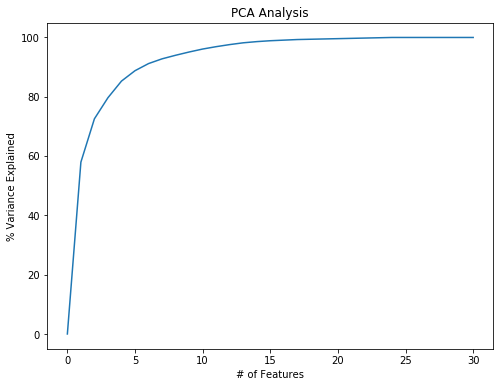

In [148]:
pca = PCA()
pca.fit(data)
explained_var = pca.explained_variance_ratio_ # calculate variance ratios
pcas_vars = np.cumsum(np.round(explained_var, decimals=3)*100)
pcas_vars = np.insert(pcas_vars, 0, 0) # insert a 0 in first position for plotting

plt.figure(1, figsize=(8, 6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.style.context('seaborn-whitegrid')
plt.plot(pcas_vars)

for i in range(1, len(pcas_vars)):
    if pcas_vars[i] >= 95:
        break
    print("# of Features: {} \nPrincipal components variance explained: {}\n".format(i, round(pcas_vars[i], 1)))